In [2]:
#Freddy Alejandro Florez Bohorquez
#Inteligencia Artificial
#enlace https://colab.research.google.com/drive/1pHM77YlkodvV3K_bcZQqN8hbmIf_eKlR?usp=sharing
#Referencia https://www.youtube.com/watch?v=J1jhfAw5Uvo

##Importamos librerias
import numpy as np               #Numpy para el manejo de arrays
import random                    #importamos un random
import matplotlib.pyplot as plt  #Matplotlib para el manejo de graficos en python
from tensorflow.keras.models import Sequential  #keras para el manejo de secuencias 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten  #Keras para el manejo de las capa, las convoluciones la capa flate y maxpoling

Preparamos los dataset tanto para pruebas como para validacion

In [4]:
X_train = np.loadtxt('/content/drive/MyDrive/CNN/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/CNN/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/CNN/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/CNN/labels_test.csv', delimiter = ',')

A continuacion la función numpy.reshape Esta función devuelve un nuevo array con los datos del array cedido como primer argumento y el nuevo tamaño indicado y como quiere hacer la parte de los datos de prueba

In [5]:
#el nuevo tamaño del vector y como quiere ir en el dataset de entrenamiento con el tamaño indicado
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

#el nuevo tamaño del vector y como quiere ir en el dataset de pruebas con el tamaño indicado
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#al final el prosentaje por lote
X_train = X_train/255.0
X_test = X_test/255.0

En esta parte me dice la estructura del vector tanto en filas como en columna tanto para pruebas como para entrenamiento

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


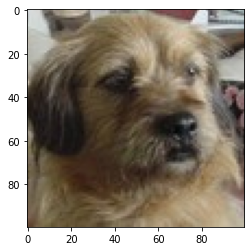

In [7]:
idx = random.randint(0, len(X_train))   #en esta parte genera un randon de datos enteso que va desde ceroa hasta el tamaño del X_train
plt.imshow(X_train[idx, :])             #luego mostramos la imagen con el slicing de X_train
plt.show()

El siguiente modelo secuencial muestra como va estar definida la red CNN este modelo secuencial se compone de unas capas unas convoluciones un maxpooling  y la capa flatten y dence que vienen de la  libreria de Keras.
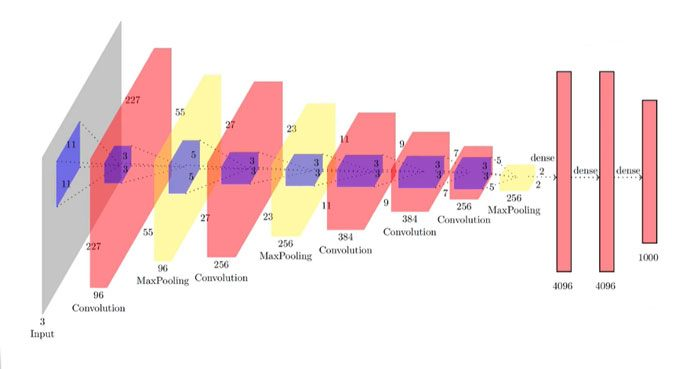

In [9]:
'''
En la secuencia se escriben las capas por lo que el primer parametro de la capa convolucionales la cantidad de filtros que 
se van a usar, luego lo que sige es el kernel le mencionamos el ancho y el alto del filtro, la funcion de activacion
luego la forma de que se define que es de 100, 100 y de tres imagenes de tamaño asi se va agregando

luego se define la proxima capa que es la de agrupacion maxima para la extraccion maxima, solo necesitamos mencionar solo 
un parametro en el que el filtro puede mensionar el siguiente salto sino toma lo que este por default y luego usaremos la capa com¿nvolucional  
y la misma pero ahora no necesitamos decir la forma de entrada es solo para la primera capa luego se aplana y se seguira con las capas dense una que 
esta definida con 64 neuronas y la ultima con una sola neurona como capa de salida
'''
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

En esta parte le adiciona al modelo secuencial  del que esta cactualmente para cada una reoitiendo los datos anteriore ademas cabe aclar que el el filtro es bueno saberlo manejar para obtenr la mejores caracteristicas que se desean delo especifico en si o el od¿bjetivo de la red

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Luego compilamos el modelo teniendo en cuenta que esto cuenta con una funcion de perdida de tipo binary_crossentropy, en esta calculan la entropia cruzada las cuales esperan valores entre 0 y 1 y un optimizador adam se mantiene el valor de entrenamiento por parametro y las metricas de probabilidad

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

En el siguiente modelo de entrenamiento se ve el los parametros del entrenamiento y el nuemro de las epocas  y el tamaño de esta en el caso que se careciera de imagenes se recomendaria aumentar las epocas debido a una relacion de 80 y 20

In [17]:
#en el siguiente el modelo de entradas y numero de epoca y el tamaño del batch size
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 19s 588ms/step - loss: 0.3696 - accuracy: 0.8475
Epoch 2/5
32/32 [==============================] - 19s 590ms/step - loss: 0.3203 - accuracy: 0.8655
Epoch 3/5
32/32 [==============================] - 19s 591ms/step - loss: 0.2820 - accuracy: 0.8810
Epoch 4/5
32/32 [==============================] - 19s 596ms/step - loss: 0.2346 - accuracy: 0.9055
Epoch 5/5
32/32 [==============================] - 19s 597ms/step - loss: 0.1992 - accuracy: 0.9230


Luego con el modelo de evalucaion revisamos las salidas si esta llevando el contro adecuado de la prediccion

In [18]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 83ms/step - loss: 0.6985 - accuracy: 0.7075


[0.6984866857528687, 0.7074999809265137]

Por ultimo evaluamos que este prediciendo el tipo de animal este viendose dentro de un plot

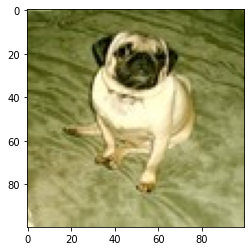

Our model says it is a : dog


In [19]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)